# Predicting the costs of used cars

## Context
Description
Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.



## Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.



## Key Questions
* What are the key factors influencing the price of used cars? 
* Is there a good pricing model that can effectively predict the price of used cars? 
* What does the performance assessment look like for such a model?

## Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.


## Data Information

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

## Let's start coding!

### Import necessary libraries

In [687]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [710]:
# loading the dataset
df = pd.read_csv("used_cars_data.csv")

In [700]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [701]:
import warnings
warnings.filterwarnings("ignore")

Observation:

There are 7253 rows and 14 columns in this dataset

In [702]:
# to view first 5 rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [703]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

In [ ]:
## Processing Columns:


In [704]:
# checking for duplicate values in the data
data.duplicated().sum()

0

- There are no duplicate values in the data.

In [705]:
# checking the names of the columns in the data
print(data.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [706]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [707]:
data.drop(["S.No."], axis=1, inplace=True)

Observations:

* There are 7253 rows and 14 columns.
* Dependent variable is the price of the used car in INR Lakhs, which if of *float* type.
* `Name`, `Location`, `Fuel_Type`, `Transmission`, `Owner_Type`,  `Mileage`, `Engine`, `Power` are of *object* type.
* `Year` and `Kilomaters_Driven` column is of *integer* type.
* All other columns are numeric in nature.
* There are some missing values in the `Mileage`, `Price`,`Engine` `Seats` columns. The Price column has significant missing values compared to others.
* Mileage, Engine, Power and New_Price columns are in Object datatype.These columns need to be converted to Numerical.



#### Processing columns
converting Mileage,  Engine	Power from to float by removing their units

In [722]:
cols = ['Mileage', 'Engine', 'Power']

In [721]:
for colname in num_values:
    df[colname] = df[colname].apply(obj_to_num)#applying above function to the column list    
    df[colname]=df[colname].replace(0.0,np.nan)

In [719]:
num_col

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [723]:
def obj_to_num(n):
    if isinstance(n, str): # checks if the columns are string datatype
        if n.endswith('kmpl'):
            return float(n.split('kmpl')[0])
        elif n.endswith('km/kg'):
            return float(n.split('km/kg')[0])
        elif n.endswith('CC'):
            return float(n.split('CC')[0])
        elif n.startswith('null'):
            return(np.nan)
        elif n.endswith('bhp'):
            return float(n.split('bhp')[0])
    else:
        return np.nan 

In [724]:
for colname in cols:
    data[colname] = data[colname].apply(obj_to_num)#applying above function to the column list    
    data[colname] = data[colname].replace(0.0,np.nan)

## Fixing Datatypes


In [725]:
data["Name"]=data["Name"].astype("category")
data["Location"]=data["Location"].astype("category")
data["Fuel_Type"]=data["Fuel_Type"].astype("category")
data["Transmission"]=data["Transmission"].astype("category")
data["Owner_Type"]=data["Owner_Type"].astype("category") 

In [726]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          7253 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(5), float64(6), int64(2)
memory usage: 577.3 KB


**Let's check for missing values in the data.**

In [684]:
# checking for missing values in the data
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                   0
New_Price               0
Price                1234
Car_Brand               0
Model                   0
dtype: int64

* `Mileage`, `Engine`, `Power`, `Seats`  and `Price` columns have 2, 46, 175, 53 and 1234 missing values respectively.
* No other column has missing values.

Let's replace any possible corrupt values like, 0.0 to Nan before proceeding.

In [728]:
data.describe(include=["category"]).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


Observations:
* Most of the cars in the data are either Mahindra XUV500 W8 2WD or Maruti Swift VDI or Maruti Swift Dzire VDI.
* Most of the cars in the data are located Mumbai, Hyderabad, Kochi and Coimbatore.
* Majority of the cars are taking fuel types Deisel and Petrol.
* Most of the cars are Manual

In [742]:
data[['Car_Brand','Model']] = data.Name.str.split(n=1,expand=True) #splitting the Brand and the car model


In [743]:
Brand_name=data['Car_Brand'].unique()
Brand_name

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [745]:
data['Car_Brand']=data['Car_Brand'].replace('ISUZU','Isuzu')
data['Car_Brand'].value_counts()


Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Hindustan           1
Ambassador          1
OpelCorsa           1
Smart               1
Lamborghini         1
Name: Car_Brand, dtype: int64

In [746]:
 data['Model'].value_counts()

XUV500 W8 2WD            55
Swift VDI                49
Swift Dzire VDI          42
City 1.5 S MT            39
Swift VDI BSIV           37
                         ..
Verna 1.4 CX VTVT         1
Sunny XL CVT              1
XUV500 W10 1.99 mHawk     1
Accord V6 AT              1
XC60 D5 Inscription       1
Name: Model, Length: 2041, dtype: int64

## Missing values

* Replace missing values in Power, Engine, Mileage, Seats and Price with its median values.



In [732]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns
#numeric_columns.remove('Price') # since it is a dependent variable let's remove Price

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [735]:
medianFiller = lambda x: x.fillna(x.median())

data[numeric_columns] = data[numeric_columns].apply(medianFiller,axis=0)

In [736]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

 The Price Column also has missing values (1234).
    

In [737]:
data[data['Price'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


Observations:

    * All missing price are filled by median values corresponding to car brand and model. 

In [738]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7253.0,18.344850,4.134077,6.40,15.40,18.20,21.10,33.54
Engine,7253.0,1615.789742,593.475257,72.00,1198.00,1493.00,1968.00,5998.00
Power,7253.0,112.312448,52.922581,34.20,77.00,94.00,138.03,616.00
Seats,7253.0,5.277678,0.809039,0.00,5.00,5.00,5.00,10.00
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.00
Price,7253.0,8.826235,10.293313,0.44,3.85,5.64,8.40,160.00


Observations:
* Price and New_Price:
    * We can see that the mean price and New Price is higher than the median price.
    * 50% of the cars have price less than or equal to 4.65 INR Lakhs.
    * The standard deviation of the price and New_Price varaibles is higher than the mean which suggests that, there were skewness in the price and New Price distributions.
* Year    
    * At least 50% of the cars were built in year 2014 and below.
    * Year of the cars has also a wide range (1996 to 2019).

* kilometers_Driven
    * Kilometers_Driven has also wide range from (34,000 to 650,000 kms).
    * At least 50% of the cars have driven 53,416kms or less.
    * The mean kilometers driven is higher than the median
    

* Engine and Power
    * The mean is higher than the median for these two variables. 


## Exploratory Data Analysis

In [564]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

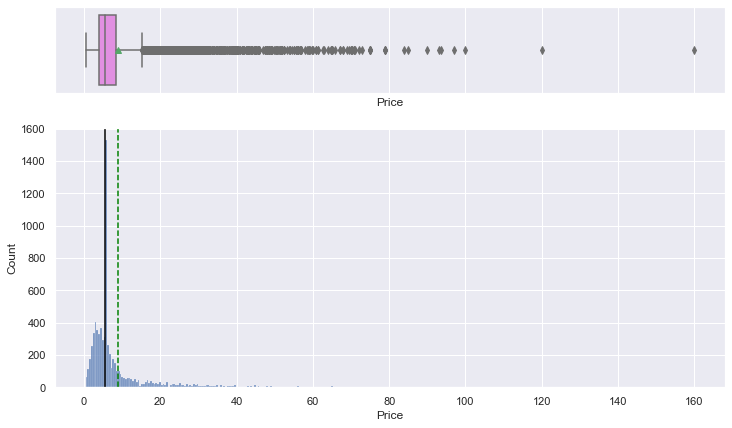

In [739]:
histogram_boxplot(data, "Price")

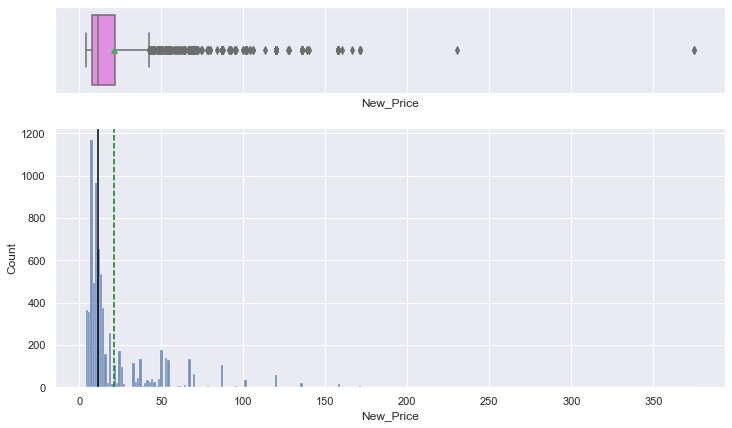

In [740]:
histogram_boxplot(data, "New_Price")

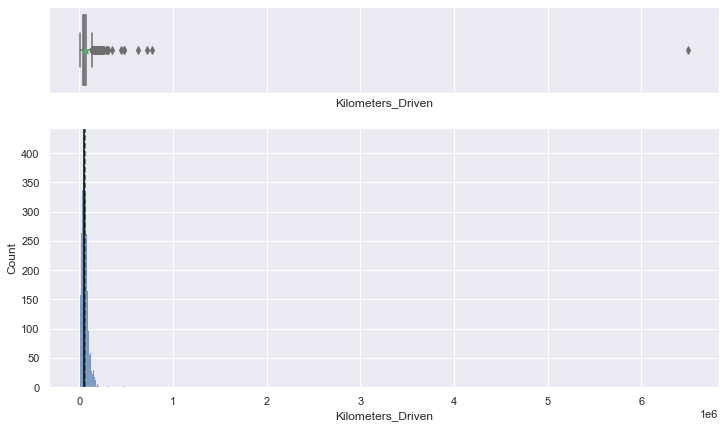

In [106]:
histogram_boxplot(data, "Kilometers_Driven")

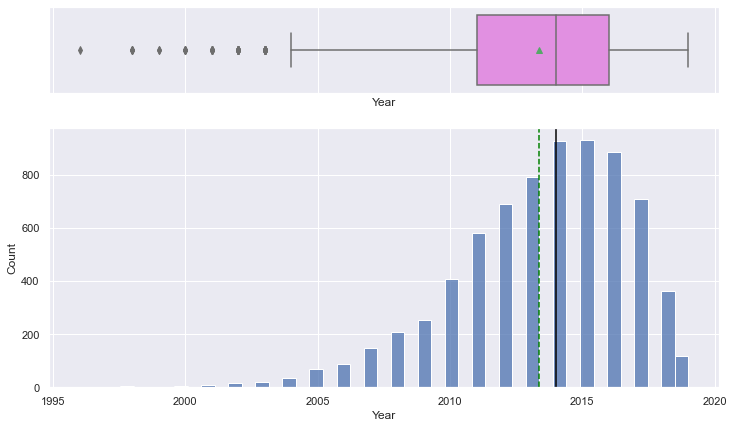

In [103]:
histogram_boxplot(data, "Year")

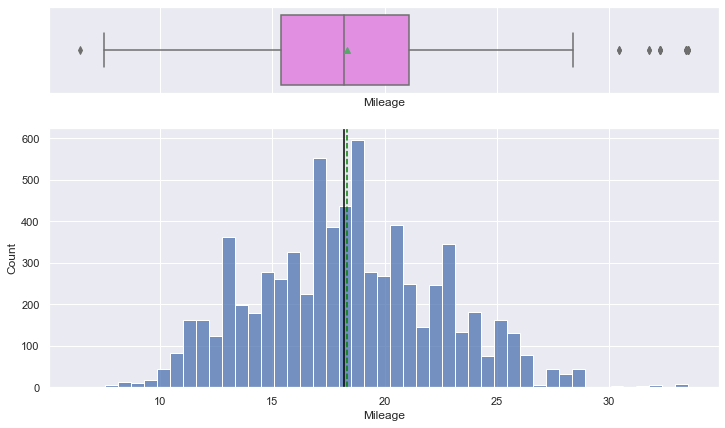

In [107]:
histogram_boxplot(data, "Mileage")

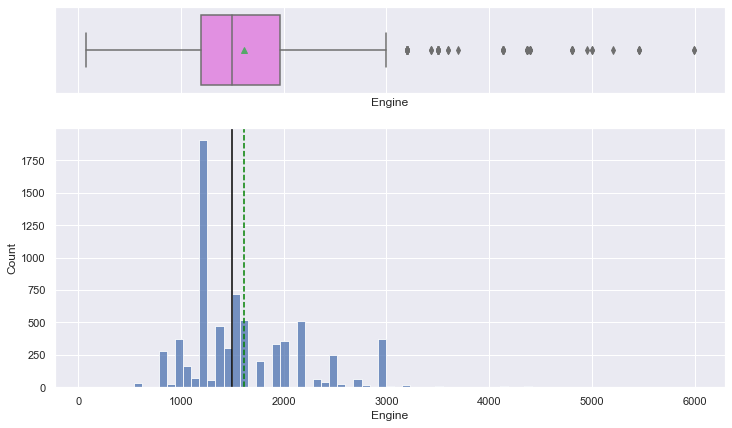

In [109]:
histogram_boxplot(data, "Engine")

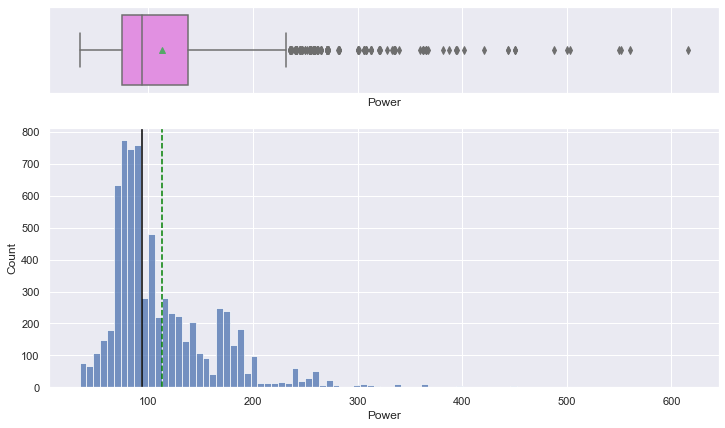

In [568]:
histogram_boxplot(data, "Power")

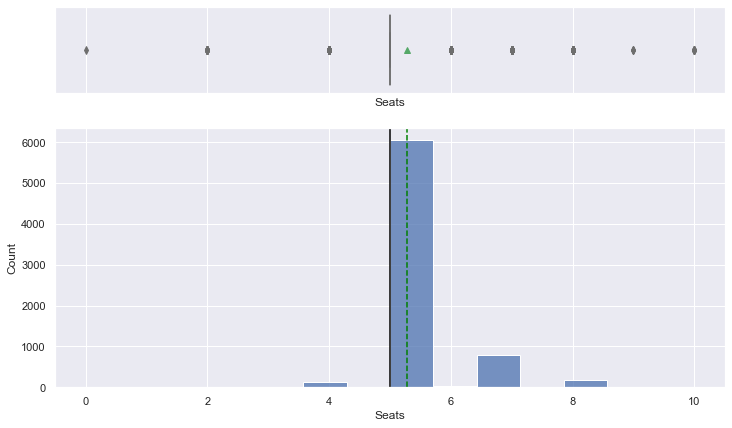

In [567]:
histogram_boxplot(data, "Seats")

**Observations**: From Both Histograms and Box plots

    * Price, New_Price and Kilometers_Driven: are heavly right skewed, they both have several outliers at the higher scale.
    * Year is left-skewed and has comparatively less outliers in the lower end.
    * Mielage has comparatively less outliers in the lower end
    * Engine and Power: were right skewed with a moderate Inter-Quartile Range and several outliers at the higher scale. We 
     will treat these outliers as they might have adverse effect in the accuracy of the prediction.

    
    
   

### Outlier Detection and Treatment

The below function removes the values samller than Lower_bound values above upper_bound.

In [595]:
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_bound = Q1 - 1.5*IQR 
    Upper_bound = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_bound, Upper_bound) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    
    for c in col_list:
        df = treat_outliers(df,c)
        
        
    return df  

In [596]:
df= data.copy()

In [597]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('Year')
numerical_col.remove('Mileage')
numerical_col.remove('Seats')

In [598]:
numerical_col

['Kilometers_Driven', 'Engine', 'Power', 'New_Price', 'Price']

## Triming/Removing Outliers

In [602]:
data = treat_outliers_all(data, numerical_col) #treating outliers 

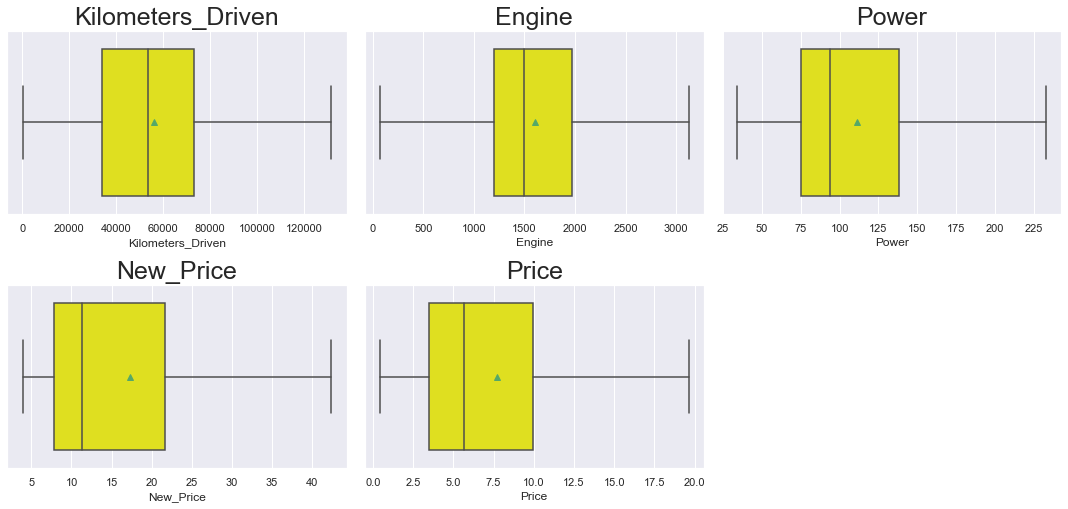

In [603]:
plt.figure(figsize=(15,35))
for i in range(len(numerical_col)):
    plt.subplot(10,3,i+1)
    sns.boxplot(data[numerical_col[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(numerical_col[i],fontsize=25)

plt.show();

In [747]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

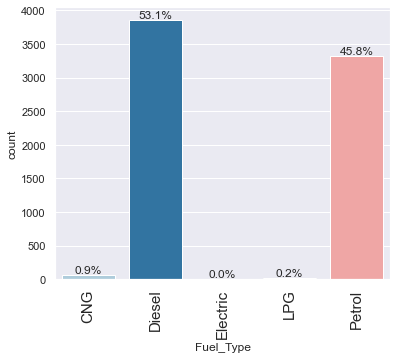

In [605]:
labeled_barplot(data, "Fuel_Type", perc=True)

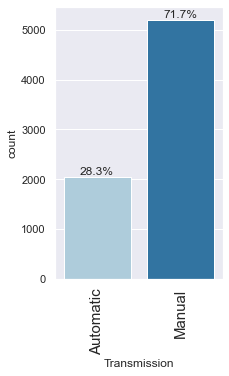

In [119]:
labeled_barplot(data, "Transmission", perc=True)

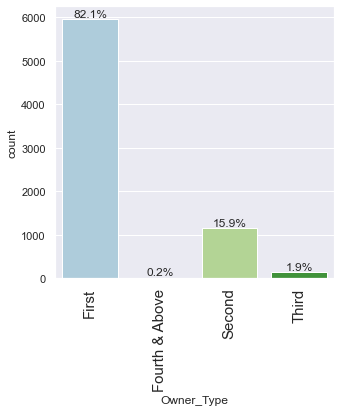

In [120]:
labeled_barplot(data, "Owner_Type", perc=True)

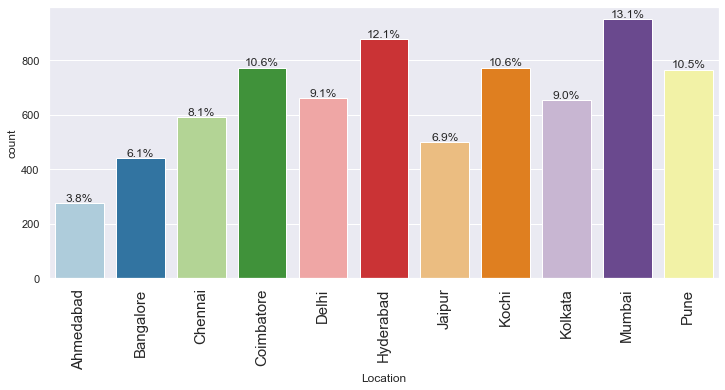

In [606]:
labeled_barplot(data, "Location", perc=True)

* Very few anime in the data are ongoing.

**Observations:**
- 82.1% of all cars only have One previous owner.
- 71% of the cars are of Manual Transmission
- Diesel is the most Preferred Fuel_type at 53.1% followed by Petrol 45.8%.
- Most of the cars are locted in Mumbai(13.1) followed by Hydrabad (12.1%), Kochi(10.6%) and Pune(10.5%). Ahmedabad city contains the least number of these type cars (only 3.8%). 

## Correlation Matrix:

In [748]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]


#corr_cols= corr_cols.remove('Model')
print(corr_cols)
#corr_cols= corr_cols.remove('Model')


['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Brand', 'Model']


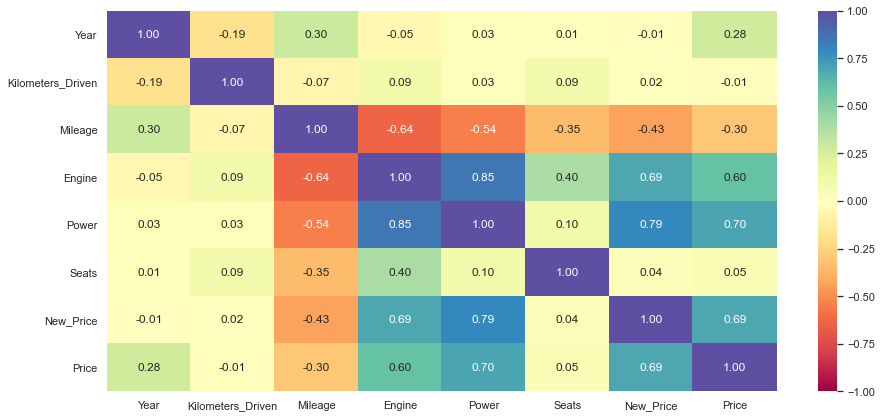

In [749]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


 

**Observation**:
 - Price has high positive correlation with Engine, Power and New Price. 
 - Similarly New Price has high positive correlation with Engine, Power and Price. 
 - Price has a very low negetaive correlation with Kilometers_driven and Mileage and low positive correlation with Seats and Year.
 - Engine has have a very high positive correlation with Power, Price and New Price 
 - Mileage has a high negative correlation with Power and Engine


## Bivariate  Association

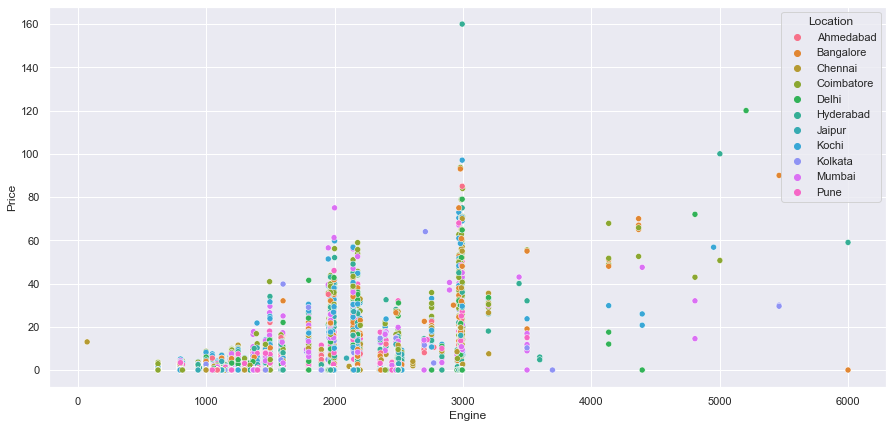

In [146]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, y='Price',x='Engine', hue ='Location')
plt.show()

**Observations**:

- We see that as Engine capacity increases Price of cars also increase.
- We also notice several exceptions to the above case

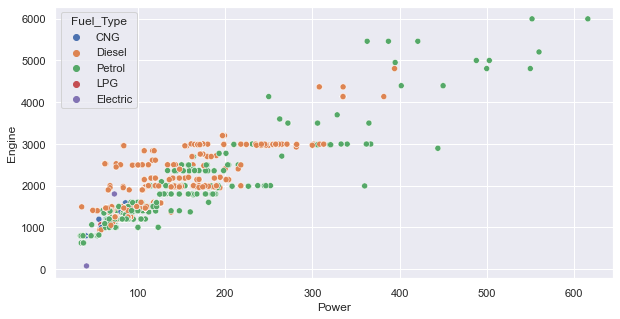

In [148]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,y='Engine',x='Power',hue='Fuel_Type')
plt.show()

 Observations:
  - we see that all the the three variables have a positive correlation.

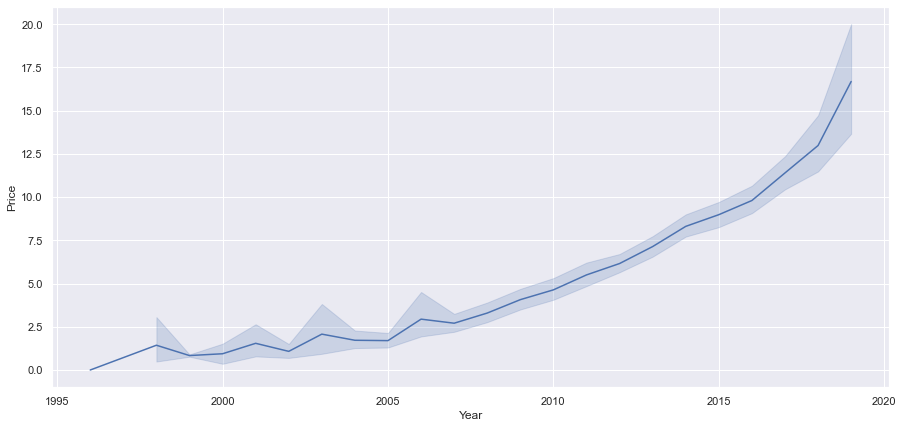

In [150]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price', data=data);

**Obervations:**
* As Manufacture Year rises, Price of Car also increases.

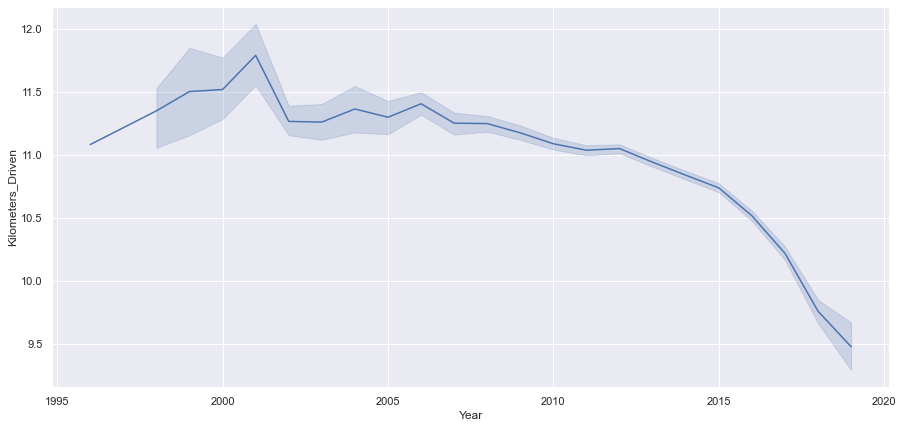

In [152]:
#Kilometers_Driven Vs Year
#Since The range for Kilometers is very wide, we will log transform to a manageable scale
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y=np.log(df['Kilometers_Driven']),data=data)
plt.show()

**Obervations:**

* Year and Kilometers_driven have a negative correlation. As Manufacture Year rises, Price of Car also decreases.

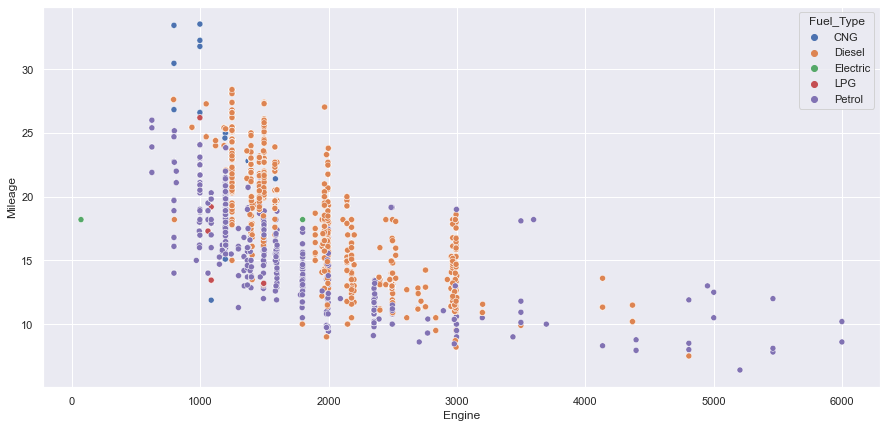

In [161]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Engine', y='Mileage',hue='Fuel_Type',  data=data);

**Obervations:**

* Mileage and Engine have a negative correlation. Most cars in Petrol has less Engine CC. 

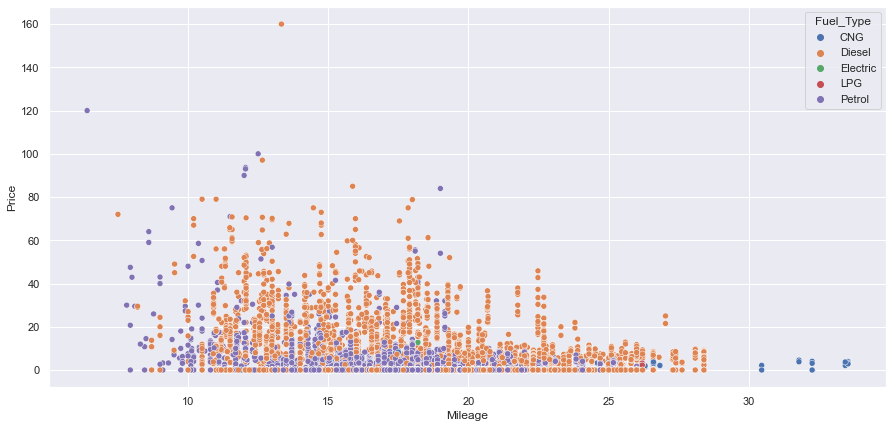

In [164]:
plt.figure(figsize=(15,7))
sns.scatterplot(y='Price', x='Mileage',hue='Fuel_Type',  data=data);

**Obervations:**

- Price and Mileage have a negative correlation.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

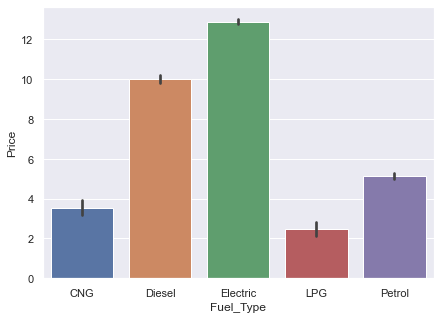

In [623]:
#Does type of Fuel affect car price?
plt.figure(figsize=(7,5))
sns.barplot(data=data,x='Fuel_Type',y='Price')

In [622]:
data['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

**Obervations:**
 - Electric cars have the highest price range, followed by Diesel. But, we have only two electric cars in our dataset.


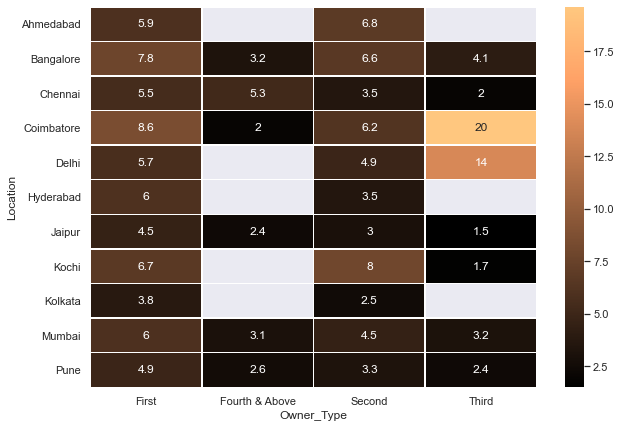

In [624]:
#Does type of ownership affect Car price?
df_hm =data.pivot_table(index = 'Location',columns ='Owner_Type',values ="Price",aggfunc=np.median)
# Draw a heatmap 
plt.subplots(figsize=(10,7))
sns.heatmap(df_hm,cmap='copper',linewidths=.5, annot=True);

**Observations:**
- Mean Price of cars decreases as number of ownership of cars increases from one to third ownership in all locations. 
- Therefore, the type of ownership has an effect on overall car price.



# Model Building


In [752]:
X = data.drop(['Name', 'Car_Brand', 'Model', 'Price'],  axis=1) 
y= data[['Price']]


In [753]:
print(X.shape)
print(y.shape)

(7253, 11)
(7253, 1)


In [754]:
X = pd.get_dummies(X, columns=['Transmission',  'Location','Owner_Type',  'Fuel_Type'], drop_first=True)


In [755]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
62,2015,58000,11.74,1796.0,186.00,5.0,49.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3017,2018,2971,13.60,1598.0,181.00,4.0,42.12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3504,2013,24027,24.70,796.0,47.30,5.0,4.36,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2156,2014,105044,12.99,2494.0,100.60,7.0,24.01,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6843,2014,98000,17.68,1968.0,174.33,5.0,67.10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Fitting linear Model

In [756]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

print("Intercept of the linear equation:", linearregression.intercept_) 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))  

Intercept of the linear equation: [-1533.86476193]
The coefficient for Year is 0.7633038999491784
The coefficient for Kilometers_Driven is -1.9621298889813514e-05
The coefficient for Mileage is -0.07462171740393296
The coefficient for Engine is 0.0014227326476260948
The coefficient for Power is 0.057717427955724834
The coefficient for Seats is -0.40950258541631135
The coefficient for New_Price is 0.13646963342955748
The coefficient for Transmission_Manual is -0.9106120265766074
The coefficient for Location_Bangalore is 1.1898432001804928
The coefficient for Location_Chennai is 0.991453243117854
The coefficient for Location_Coimbatore is 1.5507436516162
The coefficient for Location_Delhi is -0.3196103102995791
The coefficient for Location_Hyderabad is 1.1979060605290146
The coefficient for Location_Jaipur is 0.7706315028980998
The coefficient for Location_Kochi is -0.17885034689059215
The coefficient for Location_Kolkata is -0.9882144493964218
The coefficient for Location_Mumbai is -0.5

In [757]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)

In [758]:
# Mean Abolute Error on test
mean_absolute_error(y_test, pred)

3.326139145753167

In [759]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

7.190467676105241

In [290]:
# R-squared on test
r2_score(y_test, pred)

0.5245167443197742

### Coefficient Interpretations

- Coefficients of `Year`, `Engine`, `Power`, `New_Price` , `LOcation: Bangalore, Chennai,Coimbatore, Hyderabad, Jaipur and Pune`;  some of of the Owner_Type and Fuel_Type varaiables, are positive.
    - Increase in these will lead to an increase in the Price.


- Coefficients of `Kilometers_Driven`, `Mileage`, `Seats`, some of the Location columns, and all of the Fuel_Type columns and  Owner_Type second columns are negative.
    - Increase in these will lead to a decrease in the Price.

In [760]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [761]:
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(linearregression, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.256483,3.332349,0.611962,0.610042,NaN


In [762]:
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(linearregression, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.190468,3.326139,0.560665,0.555557,NaN


 
**Observations:**

- The train and test $R^2$ are 0.55 and 0.52, indicating that modelexplains 55.4%  and52.2% of the total varaition in the train and test sets respectively.

- RMSE values on the train and test sets are also comparable, which shows that the model is not overfitting

- MAE indicates that our current model is able to predict Price within a mean error of 3.8

- However , the overall performance isnot so great.

In [39]:
X = data.drop(["rating"], axis=1)
y = data["rating"]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [40]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,eps,duration,ongoing,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,mediaType_is_missing,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,1,107.0,False,0,0,0,58831.0,1453,21733,124,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,130.0,False,0,0,1,45892.0,946,17148,132,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,111.0,False,0,0,0,8454.0,280,6624,150,6254,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27,1,125.0,False,0,0,0,115949.0,589,12388,161,82752,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31,1,117.0,False,0,0,0,35896.0,538,15651,130,26465,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [41]:
X.shape

(7465, 71)

<IPython.core.display.Javascript object>

### Split the data into train and test

In [405]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [406]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


### Fitting a linear model

In [407]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [408]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,7.626885e-01
Kilometers_Driven,-1.985339e-05
Mileage,-6.631562e-02
Engine,1.624040e-03
Power,5.714427e-02
...,...
Fuel_Type_Diesel,-8.179942e-01
Fuel_Type_Electric,-1.110223e-16
Fuel_Type_LPG,-1.617080e-01
Fuel_Type_Petrol,-2.021509e+00


### Model performance check

In [409]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [410]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.044235,3.855098,0.554998,0.552795,NaN


In [411]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.807419,3.820283,0.524517,0.518988,NaN


**Observations**

- The train and test $R^2$ are 0.554 and 0.525, indicating that the model explains 52.2% and 51.6% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable. This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict car price within a mean error of 3.82

- However, the overall performance is not so great.

## Forward Feature Selection using *SequentialFeatureSelector*

We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*.

- Reduces dimensionality
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization)
- Speeds training/testing

We'll use forward feature selection on all the variables

In [775]:
!pip install mlxtend

In [764]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:    3.0s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished

[2022-01-31 21:19:52] Features: 1/25 -- score: 0.4703873721558752[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2022-01-31 21:19:52] Features: 2/25 -- score: 0.5422089556588683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel

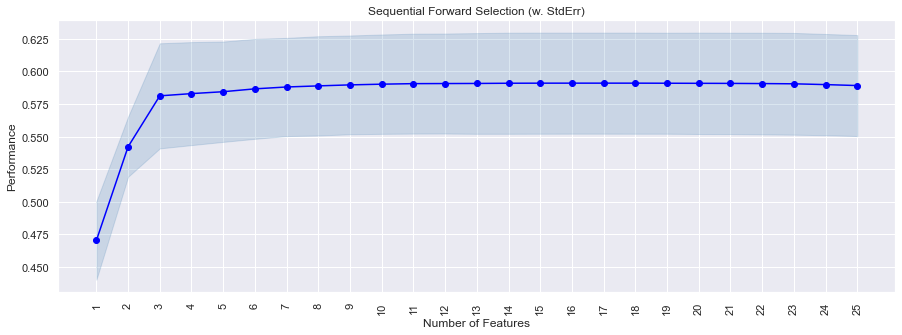

In [765]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

- We can see that performance increases till the 4th feature and then slowly becomes constant afterwards.
- The decision to choose the *k_features* now depends on the adjusted $R^2$ vs the complexity of the model.
    - After the 3rd feature there is no too much increase, but it shows a little bin incrase untile 20th feature with an adjusted $R^2$ of 0.596
    - The increase in adjusted $R^2$ is not very significant as we are getting the same values with a less complex model.
- So we'll use 20 features only to build our model, but you can experiment by taking a different number.


In [766]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=20,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2022-01-31 21:20:11] Features: 1/20 -- score: 0.4703873721558752[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2022-01-31 21:20:11] Features: 2/20 -- score: 0.5422089556588683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [767]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24]


In [768]:
# let us look at the names of the important features
X_train.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Owner_Type_Fourth & Above', 'Owner_Type_Third', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')

**Now we will fit an sklearn model using these features only.**

In [769]:
x_train_final = X_train[X_train.columns[feat_cols]]

In [340]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = X_test[x_train_final.columns]

In [770]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                           Coefficients
Year                           0.761682
Kilometers_Driven             -0.000020
Engine                         0.001741
Power                          0.061262
Seats                         -0.380398
New_Price                      0.142165
Location_Bangalore             1.318751
Location_Chennai               1.116207
Location_Coimbatore            1.736008
Location_Delhi                -0.186112
Location_Hyderabad             1.340378
Location_Jaipur                0.840523
Location_Kolkata              -0.918585
Location_Mumbai               -0.346967
Location_Pune                  0.593923
Owner_Type_Fourth & Above      1.312536
Owner_Type_Third               1.525099
Fuel_Type_Electric             0.000000
Fuel_Type_LPG                  0.691607
Fuel_Type_Petrol              -0.867273
Intercept                  -1534.489121


In [771]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.267704,3.338589,0.610569,0.609029,NaN


In [772]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.22435,3.373904,0.556515,0.552399,NaN


- The performance looks better than the previous model.
- Let's compare the two models we built.

In [773]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,6.256483,6.267704
MAE,3.332349,3.338589
R-squared,0.611962,0.610569
Adj. R-squared,0.610042,0.609029
MAPE,NaN,NaN


In [774]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,7.190468,7.224350
MAE,3.326139,3.373904
R-squared,0.560665,0.556515
Adj. R-squared,0.555557,0.552399
MAPE,NaN,NaN


* The new model (*lin_reg_model2*) uses lower number of features as compared to the previous model (*linearregression*).
* The performance of the new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.
* **We will be moving forward with *lin_reg_model2* as it shows better performance.**

## Conclusions

- We have been able to build a predictive model that can be used by Cars4U to predict the Price of cars with an $R^2$ of 0.611 on the training set.

- Cars4U can use this model to predict the cars price within a mean error of 0.33

- We found that `Year`, `Engine`, `Power`, `New_Price` , `Location: Bangalore, Chennai,Coimbatore, Hyderabad, Jaipur and Pune` are some of the factors that tend to increase the Price of the cars.
    
- On the other hand `Kilometers_Driven`, `Mileage`, and `Seats` are some of the factors that tend to decrease the Price of the cars.
